<a href="https://colab.research.google.com/github/eswar554/task_2_in_vts/blob/main/task2_LR_and_LGR_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Linear Regression (Predict House Prices)**

1. Load the dataset (You can create a CSV file with sample data or generate synthetic
data).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df_house = pd.read_csv("/content/House Price Prediction Dataset.csv")

df_house

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [ ]:
df_house.dropna()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


2 Preprocess the data (handle missing values, normalize features if needed).


In [ ]:
# categorical columns
categorical_columns = df_house.select_dtypes(include=['object']).columns

# Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_house[col] = le.fit_transform(df_house[col])
    label_encoders[col] = le

# Handling missing values for numerical columns
df_house.fillna(df_house.select_dtypes(include=[np.number]).median(), inplace=True)

In [ ]:
df_house.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

3 Train a Multiple Linear Regression model using sklearn.linear_model.LinearRegression.

In [ ]:
# Selecting relevant features and target variable
features = ['Area', 'Bedrooms', 'Bathrooms', 'Location']
target = 'Price'

# Extracting features and target variable
x = df_house[features]
y = df_house[target]

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)

# Normalizing the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Training the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

array([495241.1678916 , 529972.01227553, 495644.99558627, ...,
       531088.04103835, 541923.71645353, 540795.78125638])

4. Evaluate the model using R² score & Mean Squared Error (MSE).


In [ ]:
# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R² Score: -0.0082
Mean Squared Error: 78412432997.7450


5. Make predictions for new houses.


In [ ]:
# Making a prediction for a new house
new_house = pd.DataFrame([[2000, 3, 2, 8]], columns=features)  # Example new house features
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)
print(f'Predicted Price for new house: ${predicted_price[0]:,.2f}')

Predicted Price for new house: $482,462.33


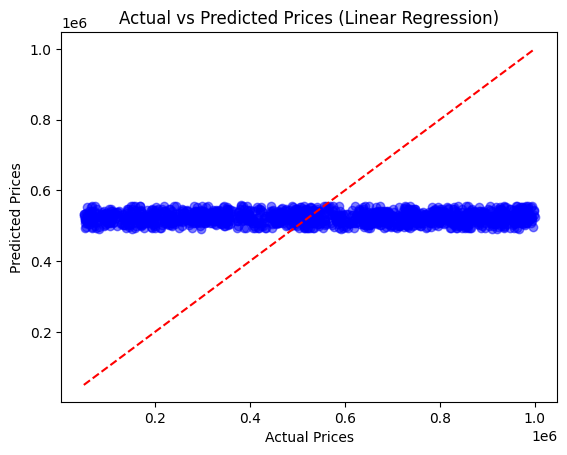

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()


# **Task 2: Logistic Regression (Customer Churn Prediction)**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report

# Load dataset
data_path = "/content/Large_Customer_Churn_Dataset.csv"
df = pd.read_csv(data_path)

# Display dataset info
display(df.head())


,CustomerID,Gender,Age,Geography,Tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,IsActiveMember,Churn
0,1000001,Male,34,France,14,Two-year,21.58,7933.34,Bank transfer,1,No
1,1000002,Female,26,Spain,14,Month-to-month,27.71,5869.34,Credit card,0,Yes
2,1000003,Male,50,Germany,57,Two-year,111.12,6321.20,Bank transfer,1,No
3,1000004,Male,37,Spain,34,Month-to-month,55.49,7956.44,Bank transfer,0,Yes
4,1000005,Male,30,Spain,53,Two-year,62.48,4922.75,Direct debit,1,No


In [ ]:
df = df[['MonthlyCharges', 'Contract', 'Tenure', 'IsActiveMember', 'Churn']].copy()

# Encode categorical column 'Contract' and 'Churn'
label_enc = LabelEncoder()
df.loc[:, 'Contract'] = label_enc.fit_transform(df['Contract'])  # Convert to 0 or 1
df.loc[:, 'Churn'] = label_enc.fit_transform(df['Churn'])  # Convert to 0 (No) or 1 (Yes)

# Normalize numerical features
scaler = StandardScaler()
df.loc[:, ['MonthlyCharges', 'Tenure']] = scaler.fit_transform(df[['MonthlyCharges', 'Tenure']])

# Features & Target
X_churn = df[['MonthlyCharges', 'Contract', 'Tenure', 'IsActiveMember']]
y_churn = df['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_churn, y_churn, test_size=0.2, random_state=42)

# Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)

# Evaluate Model
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.52

Confusion Matrix:
 [[47 53]
 [43 57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.47      0.49       100
           1       0.52      0.57      0.54       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200




Will the New Customer Churn? Yes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


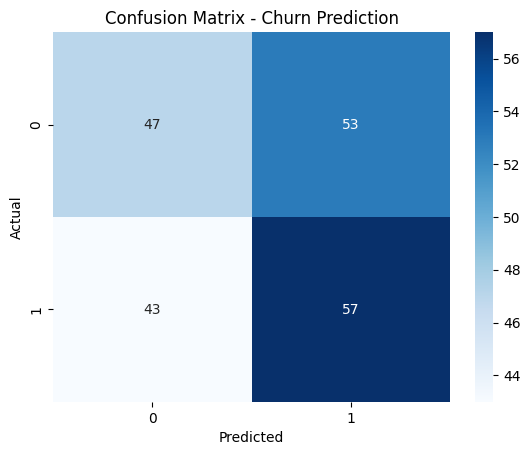

In [ ]:
# Predict Churn for a New Customer
new_customer = np.array([[75, 0, 18, 2]])  # Example: $75 charge, month-to-month, 18 months, 2 support requests
new_customer = new_customer.astype(float)  # Ensure float type for scaling
new_customer[:, [0, 2]] = scaler.transform(new_customer[:, [0, 2]])  # Normalize numerical features
churn_prediction = logistic_model.predict(new_customer)
print("\nWill the New Customer Churn?", "Yes" if churn_prediction[0] == 1 else "No")

# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Churn Prediction")
plt.show()